In [97]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 6]
import matplotlib.dates as dates
import seaborn as sns
import arviz as az

In [86]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d.%m.%Y")

In [87]:
data = pd.read_csv("data.tsv",sep="\t",parse_dates=["Datum"],date_parser=custom_date_parser)
data

,Datum,Gewicht
0,2022-03-01,92.9
1,2022-03-12,92.4
2,2022-03-17,92.2
3,2022-03-20,91.7
4,2022-03-24,92.0
5,2022-03-25,91.3
6,2022-03-29,91.0
7,2022-03-30,90.7
8,2022-04-03,90.8
9,2022-04-05,90.4


In [88]:
#data['Datum_num']=data['Datum'].map(datetime.toordinal)

In [89]:
data['Datum_num']=data['Datum'].map(dates.date2num)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datum      30 non-null     datetime64[ns]
 1   Gewicht    30 non-null     float64       
 2   Datum_num  30 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 848.0 bytes


In [91]:
data

,Datum,Gewicht,Datum_num
0,2022-03-01,92.9,19052.0
1,2022-03-12,92.4,19063.0
2,2022-03-17,92.2,19068.0
3,2022-03-20,91.7,19071.0
4,2022-03-24,92.0,19075.0
5,2022-03-25,91.3,19076.0
6,2022-03-29,91.0,19080.0
7,2022-03-30,90.7,19081.0
8,2022-04-03,90.8,19085.0
9,2022-04-05,90.4,19087.0


In [92]:
n = len(data)

C:\devsbb\Anaconda3\envs\pymc_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


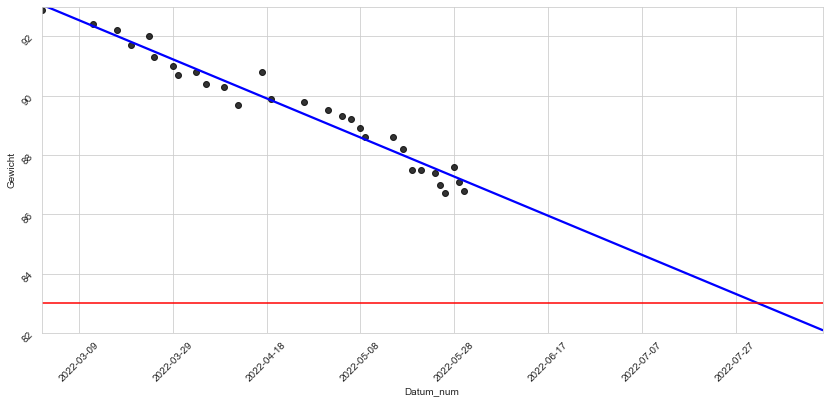

In [98]:
@plt.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots()
ax.set_xlim([data.Datum_num[0],data.Datum_num[n-1]*1.004])
ax.set_ylim([82,93])
# just use regplot if you don't need a FacetGrid
sns.regplot('Datum_num', 'Gewicht', data=data, ax=ax,ci=0, color="black",line_kws={"color": "blue"},truncate=False)
plt.axhline(83, color = 'r', linestyle = '-')

# here's the magic:
ax.xaxis.set_major_formatter(fake_dates)

# legible labels
ax.tick_params(labelrotation=45)